In [1]:
from movement.io.load_poses import from_file
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm import tqdm


Goal: produce a plot per animal comulative (each day) of the confidence per keypoint 

In [2]:
dir = Path(r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting")

In [3]:
days = []
for i in dir.iterdir():
    if os.path.isdir(i):
        if len([file for file in i.iterdir()]) in range(8, 11):
            days.append(i)

In [4]:
dm = {}
for n, day in enumerate(days):
    dm[n] = [m if os.path.isdir(m) else '' for m  in day.glob("M*")]



In [2]:
tot = {}
for key in dm.keys():
    mf = {}
    for n, dir in enumerate(dm[key]):
        vidoes = []
        if dir is None:
            continue
        if os.path.isdir(dir):

            for file in dir.iterdir():
                if os.path.isdir(file)  and 'cropped' in file.name: #handle case where mouse/data:
                    for f in file.glob("*predictions.slp"):
                        if 'central' in f.name:
                            continue
                        vidoes.append(f)
                if os.path.isdir(file) and 'cropped' not in file.name: #handle when we have mouse/dir/data
                    for f in file.iterdir():
                        if os.path.isdir(f) and 'cropped' in f.name:
                            for ff in f.glob("*predictions.slp"):
                                if 'central' in ff.name:
                                    continue
                                vidoes.append(ff)
                
        mf[n] = vidoes
    tot[key] = mf


NameError: name 'dm' is not defined

In [15]:
pat_vid_dir = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240803\M5\143211\multicam_video_2024-08-03T14_58_09_cropped_20241210155931"
files = [f if 'central' not in f.name else '' for f in Path(pat_vid_dir).glob("*predictions.slp")]

In [ ]:
def plot_confidence(dir):
    '''
    It plots the confidences of the predictions SLEAP over time, avg per body part and view

    input: directory containing the .slp files

    output: plot of the confidences
    '''
    files = [f if 'central' not in f.name else '' for f in Path(dir).glob("*predictions.slp")]

    m_confs = []
    for f in files:
        if f == '':
            continue 
        m_confs.append(from_file(f, 'SLEAP').confidence.values)
    confs_arrs = np.asarray(m_confs, dtype=object)
    confs_arr_corrected = np.nan_to_num(confs_arrs, nan=-1)
    val = np.mean(confs_arr_corrected, axis=(0, 2))
    plt.figure()
    plt.plot(val)
    plt.title('Mean confidence over time, avg per view, per keypoint, nan=-1')
    plt.show()

    


In [16]:
files

['',
 WindowsPath('D:/P05_3DRIG_YE-LP/e01_mouse_hunting/v04_mice-hunting/20240803/M5/143211/multicam_video_2024-08-03T14_58_09_cropped_20241210155931/multicam_video_2024-08-03T14_58_09_mirror-bottompredictions.slp'),
 WindowsPath('D:/P05_3DRIG_YE-LP/e01_mouse_hunting/v04_mice-hunting/20240803/M5/143211/multicam_video_2024-08-03T14_58_09_cropped_20241210155931/multicam_video_2024-08-03T14_58_09_mirror-leftpredictions.slp'),
 WindowsPath('D:/P05_3DRIG_YE-LP/e01_mouse_hunting/v04_mice-hunting/20240803/M5/143211/multicam_video_2024-08-03T14_58_09_cropped_20241210155931/multicam_video_2024-08-03T14_58_09_mirror-rightpredictions.slp'),
 WindowsPath('D:/P05_3DRIG_YE-LP/e01_mouse_hunting/v04_mice-hunting/20240803/M5/143211/multicam_video_2024-08-03T14_58_09_cropped_20241210155931/multicam_video_2024-08-03T14_58_09_mirror-toppredictions.slp')]

In [23]:
from_file(files[1], 'SLEAP')

<xarray.Dataset> Size: 14MB
Dimensions:      (time: 89759, space: 2, keypoints: 13, individuals: 1)
Coordinates:
  * time         (time) int32 359kB 0 1 2 3 4 ... 89754 89755 89756 89757 89758
  * space        (space) <U1 8B 'x' 'y'
  * keypoints    (keypoints) <U12 624B 'nose' 'Lear' ... 'UpperMid' 'UpperBack'
  * individuals  (individuals) <U12 48B 'individual_0'
Data variables:
    position     (time, space, keypoints, individuals) float32 9MB nan ... nan
    confidence   (time, keypoints, individuals) float32 5MB 0.0 1.004 ... nan
Attributes:
    fps:              None
    time_unit:        frames
    source_software:  SLEAP
    source_file:      D:/P05_3DRIG_YE-LP/e01_mouse_hunting/v04_mice-hunting/2...
    ds_type:          poses

In [24]:
m_confs = []
for f in files:
    if f == '':
        continue 
    m_confs.append(from_file(f, 'SLEAP').confidence.values)

In [ ]:
m_confs = {}
for mouse in range(1,2):
    confs = []
    for day in tot.values():
        for slp in day[mouse]:
            xr = from_file(slp, 'SLEAP')
            confs.append(xr.confidence.values)
    m_confs[mouse] = confs



In [26]:
confs_arrs = np.asarray(confs, dtype=object)

In [29]:
# set nan to -1 
confs_arr_corrected = np.nan_to_num(confs_arrs, nan=-1)

In [41]:
val = np.mean(confs_arr_corrected, axis=(0, 2))

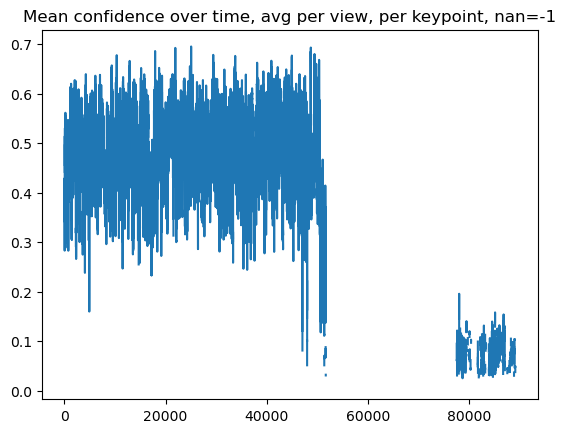

In [ ]:
# broken video
plot_confidence(pat_vid_dir)

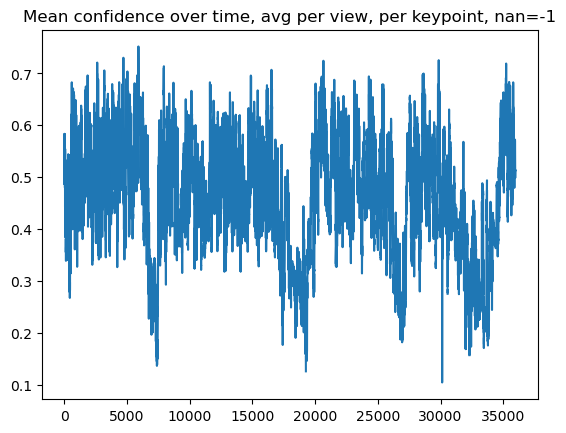

In [49]:
pat_dir_1st_r = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240724\100455\multicam_video_2024-07-24T10_20_07_cropped_20241209165236"
plot_confidence(pat_dir_1st_r)

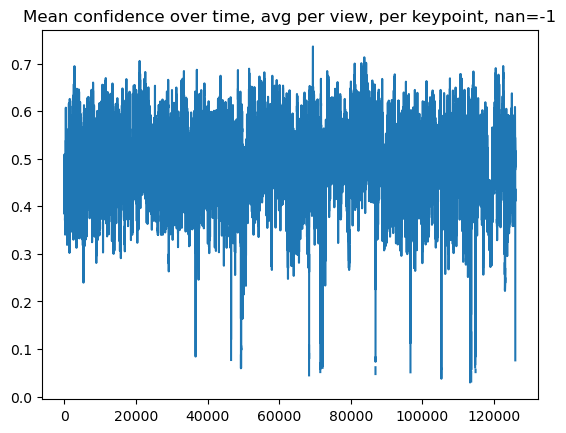

In [8]:
path_new_model = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\test_cropping\try_model\multicam_video_2024-08-05T15_45_21_cropped_20241210155931"
plot_confidence(path_new_model)

In [ ]:
path_old_model = r"D:\P05_3DRIG_YE-LP\e01_mouse_hunting\v04_mice-hunting\20240805\M6\152207\multicam_video_2024-08-05T15_45_21_cropped_20241210155931"
plot_confidence(path_old_model)

In [25]:
# Delete this cell
path_to_test = "D:/P05_3DRIG_YE-LP/e01_mouse_hunting/data_newm/multicam_video_2024-08-05T15_45_21_cropped_20241210155931_triangulated_points_dlc_checkerboard.h5"
from_file(path_to_test, 'DeepLabCut')

ValueError: cannot reshape array of size 6550024 into shape (1,13,3)

make hist

In [23]:
def hist_confs(dir, ax=None, *args, **kwargs):
    '''
    It plots the confidences of the predictions SLEAP over time, avg per body part and view

    input: directory containing the .slp files

    output: plot of the confidences
    '''
    files = [f if 'central' not in f.name else '' for f in Path(dir).glob("*predictions.slp")]

    m_confs = []
    for f in files:
        if f == '':
            continue 
        m_confs.append(from_file(f, 'SLEAP').confidence.values)
    confs_arrs = np.asarray(m_confs, dtype=object)
    confs_arr_corrected = np.nan_to_num(confs_arrs, nan=-1)
    val = np.mean(confs_arr_corrected, axis=(0, 2))

    if ax is None: 
        f, ax = plt.subplots()
    ax.hist(val, **kwargs)
    ax.set_title('Mean confidence over time, avg per view, per keypoint, nan=-1')
    ax.set_yscale('log')

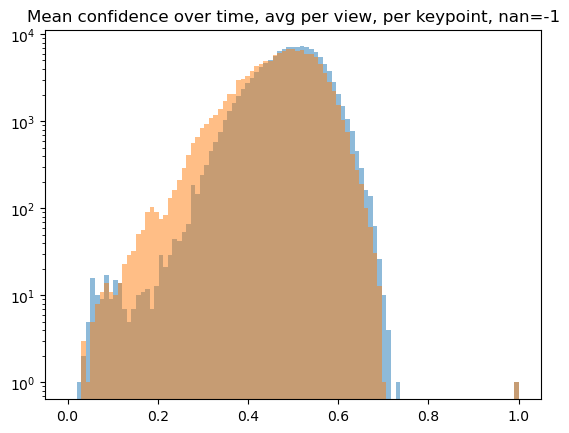

In [24]:
f, ax = plt.subplots()
bins = np.linspace(0, 1, 100)
hist_confs(path_new_model, bins=bins, alpha=0.5, ax=ax)
hist_confs(path_old_model, bins=bins, alpha=0.5, ax=ax)
plt.show()

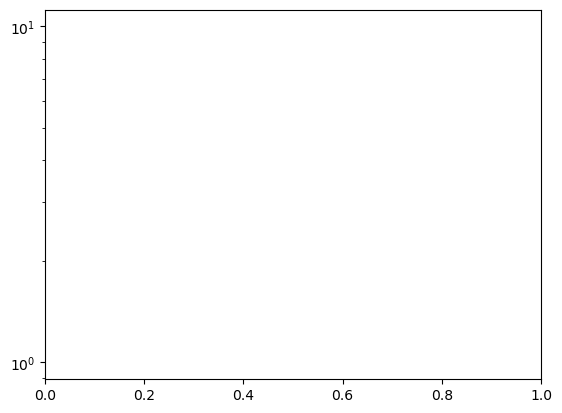

In [22]:
f, ax = plt.subplots()
ax.set_yscale('log')

c:\Users\SNeurobiology\miniconda3\envs\lab-env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\SNeurobiology\miniconda3\envs\lab-env\lib\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


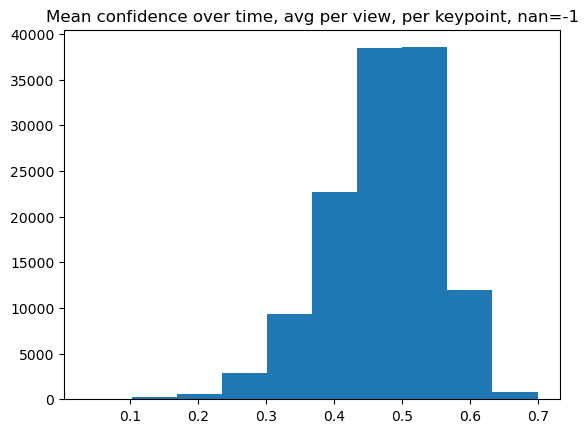

In [13]:
hist_confs(path_old_model)

## Other tries

In [212]:
arrs = []
for recording in np.arange(0, 32, 4):
    print(recording)
    arrs.append(confs[recording:recording+4])

0
4
8
12
16
20
24
28


In [215]:
c = np.asarray(confs, dtype='object')

In [238]:
v = np.nanmean(c[0], axis=1)
v[v<.2].shape

(274,)

C:\Users\SNeurobiology\AppData\Local\Temp\ipykernel_7180\451514378.py:2: RuntimeWarning: Mean of empty slice
  data = np.nanmean(c[i-1], axis=1)


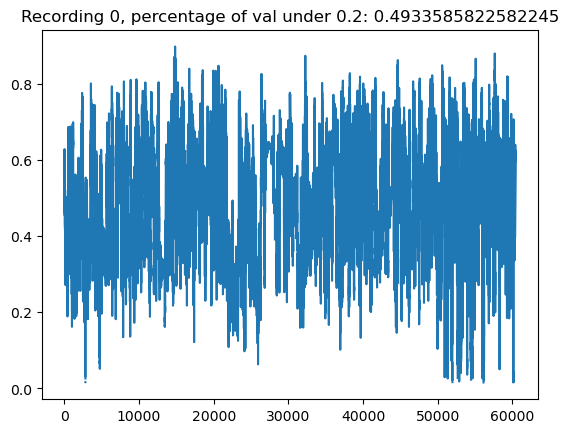

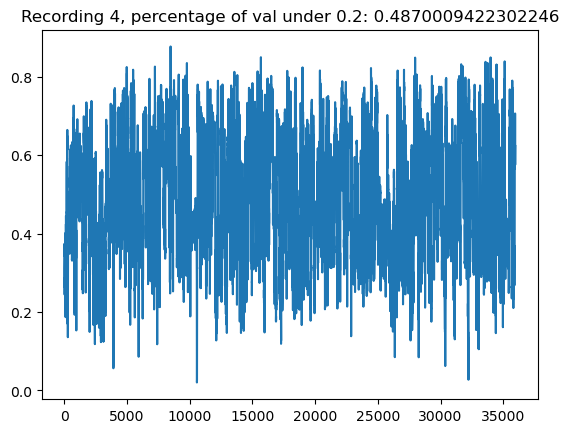

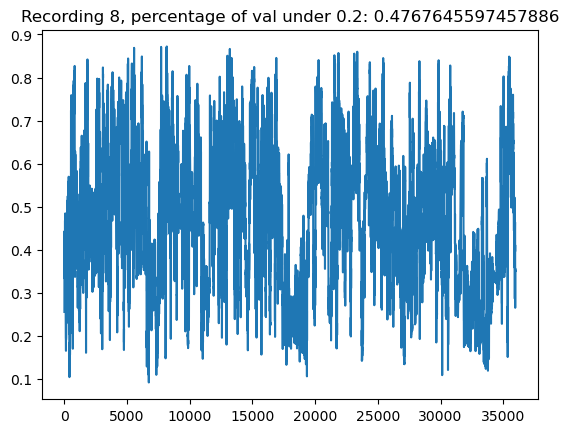

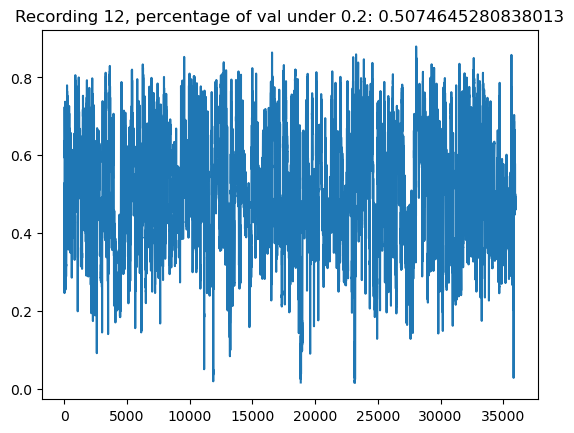

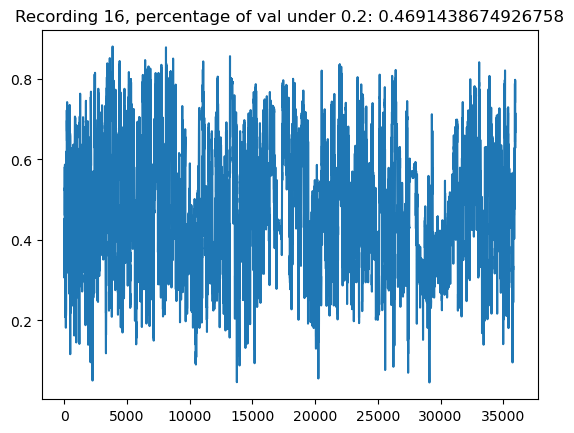

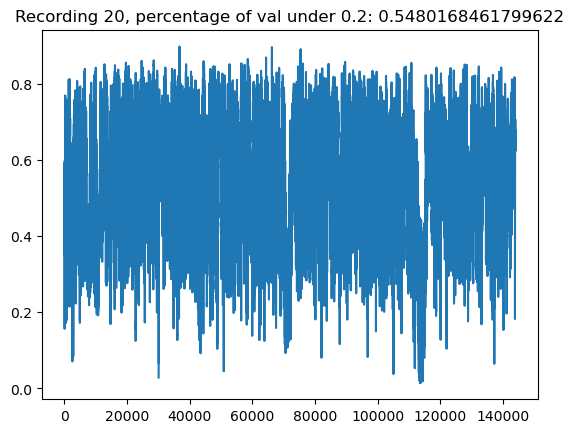

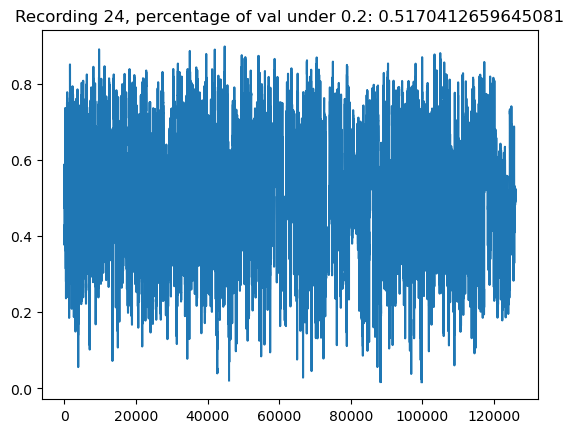

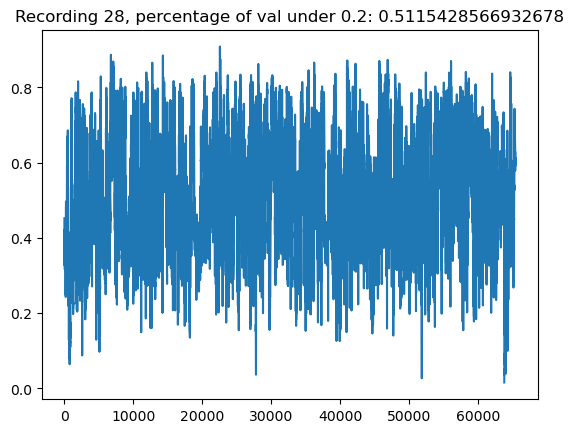

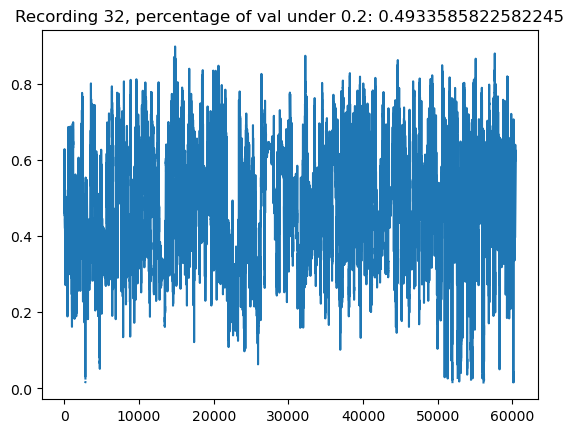

In [243]:
for i in range(0, len(c)+4, 4):
    data = np.nanmean(c[i-1], axis=1)
    low_val = data[data<.5].shape[0] / data.shape[0]
    plt.figure()
    plt.plot(data)
    plt.title(f'Recording {i}, percentage of val under 0.2: {np.nanmedian(data)}')
    plt.show()


In [223]:
np.nanmean(c[0], axis=1).shape

(35961, 1)

In [188]:
confs = np.array(confs)

In [198]:
np.mean(confs, axis=(2, 1))

array([[0.49385658],
       [0.4658624 ],
       [0.5005513 ],
       [0.48013884],
       [0.5311816 ],
       [0.49405152],
       [0.49798536],
       [0.45827308]], dtype=float32)